# Classy background module

Start by importing packages to be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})


Define our instance of Class from classy, conventionally named "cosmo". Each Instance will store a single cosmology at a given time.

In [2]:
# Initialise the Class instance
cosmo = Class()

Each instance of Class is initialised with the default values for all cosmological parameters, and is ready to compute.

When asking the wrapper for output, the cosmology will automatically be computed up to the necessary module to produce this output, here we are asking for the background

In [3]:
# Exctract dictionary of background quantities
bg = cosmo.get_background()

# Print its keys: these are the contents of the dictionary
print(bg.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


In [4]:
# Here I define a few quantities from the dictionary
z = bg['z']
rho_cdm = bg['(.)rho_cdm']
rho_crit = bg['(.)rho_crit']

# Now use the same syntax to define the baryon and photon energy densities
rho_b = bg['(.)rho_b']
rho_phot = bg['(.)rho_g']
rho_lambda = bg['(.)rho_lambda']

Text(0, 0.5, '$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

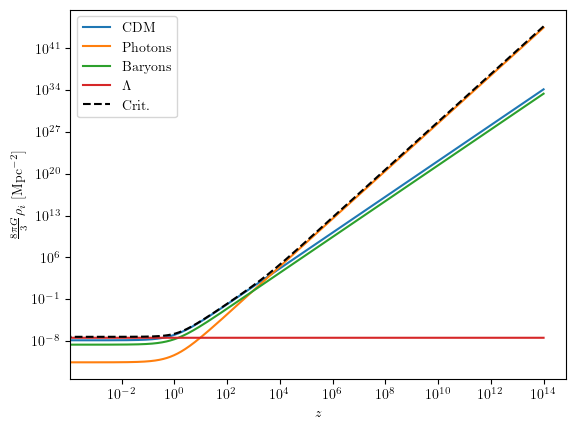

In [5]:
plt.loglog(z,rho_cdm,label='CDM')

# Uncomment these lines when you have correctly set the quantities to plot

plt.loglog(z,rho_phot,label='Photons')
plt.loglog(z,rho_b,label='Baryons')
plt.loglog(z,rho_lambda,label='$\\Lambda$')


plt.loglog(z,rho_crit,'k--',label='Crit.')

plt.legend()

plt.xlabel('$z$')
plt.ylabel('$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

Let's define an identical cosmology, except with 50% more baryonic matter.

In [6]:
# Define new Class instance
cosmo_extra_baryons = Class()

#set omega_b parameter
cosmo_extra_baryons.set({'Omega_b':cosmo.Omega_b()*1.5})

True

In [7]:
cosmo_extra_baryons.age()/cosmo.age()

0.9788812637149618

And another one, which has increased dark matter density instead of baryonic.

In [8]:
# Define new Class instance
cosmo_extra_dm = Class()

#set omega_b parameter
cosmo_extra_dm.set({'Omega_cdm':cosmo.Omega0_cdm()*1.5})

True

In [9]:
rho_ur = bg['(.)rho_ur']

rho_cdm_extra_dm = cosmo_extra_dm.get_background()['(.)rho_cdm']
# rho_ur_extra_dm = cosmo_extra_dm.get_background()['(.)rho_ur']
rho_crit_extra_dm = cosmo_extra_dm.get_background()['(.)rho_crit']

z_eq_extra_dm = cosmo_extra_dm.z_eq()
# rho_cdm_extra_dm = cosmo_extra_dm.bg['(.)rho_cdm']

Lets do another plot, showing explicitly the times of matter/radiation equality for the standard and extra DM cosmologies

Text(0, 0.5, '$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

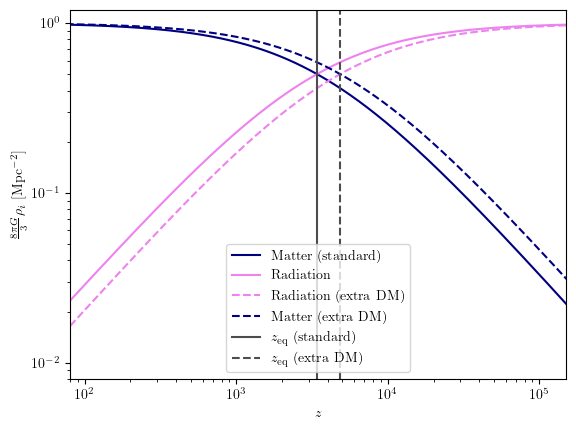

In [10]:
plt.loglog(z,(rho_cdm+rho_b)/rho_crit,color='navy',label='Matter (standard)')
# plt.loglog(z,rho_crit,label='Crit.')

# Uncomment these lines when you have correctly set the quantities to plot

plt.loglog(z,(rho_phot+rho_ur)/rho_crit,color='violet',label='Radiation')

plt.loglog(z,(rho_phot+rho_ur)/rho_crit_extra_dm,'--',color='violet',label='Radiation (extra DM)')

plt.loglog(z,(rho_cdm_extra_dm+rho_b)/rho_crit_extra_dm,'--',color='navy',label='Matter (extra DM)')

plt.axvline(cosmo.z_eq(),color='0.3',linestyle='-',label='$z_{\\mathrm{eq}}$ (standard)')
plt.axvline(z_eq_extra_dm,color='0.3',linestyle='--',label='$z_{\\mathrm{eq}}$ (extra DM)')


plt.legend()

plt.xlim([8e1,1.5e5])
plt.ylim([8e-3,1.2])

plt.xlabel('$z$')
plt.ylabel('$ \\frac{8\\pi G}{3}\\rho_i$ [Mpc$^{-2}$]')

Let's now define a cosmology with a single massive neutrino species:

In [11]:
cosmo_mnu = Class()
cosmo_mnu.set({'N_ncdm':1, 'm_ncdm':0.1, 'Neff':3.044})
bg_mnu = cosmo_mnu.get_background()
print(bg_mnu.keys())

dict_keys(['z', 'proper time [Gyr]', 'conf. time [Mpc]', 'H [1/Mpc]', 'comov. dist.', 'ang.diam.dist.', 'lum. dist.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', '(.)rho_tot', '(.)p_tot', '(.)p_tot_prime', 'gr.fac. D', 'gr.fac. f'])


From the quantities of the background array, let's plot the massive neutrino equation-of-state parameter

\begin{equation} w_\text{ncdm} = p_\text{ncdm} / \rho_\text{ncdm} \end{equation}

Text(0, 0.5, '$w_\\mathrm{ncdm}$')

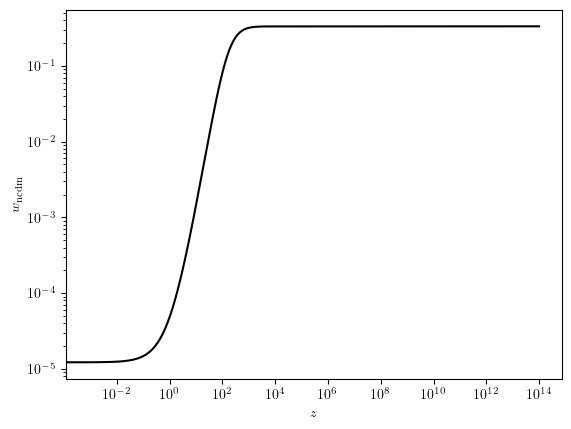

In [12]:
p_ncdm = bg_mnu['(.)p_ncdm[0]']
rho_ncdm = bg_mnu['(.)rho_ncdm[0]']

plt.loglog(z,p_ncdm/rho_ncdm,'k')

plt.xlabel('$z$')
plt.ylabel('$w_\\mathrm{ncdm}$')

Another important result from the background model is cosmological distances. 

Let's compare a simple $\Lambda$+CDM universe with an Einstein-de Sitter (only matter).

In [14]:
#Lambda CDM
LCDM = Class()
LCDM.set({'Omega_cdm':0.25,'Omega_b':0.05})

#Einstein-de Sitter
CDM = Class()
CDM.set({'Omega_cdm':0.95,'Omega_b':0.05})

bg_LCDM = LCDM.get_background()
bg_CDM = CDM.get_background()

Note that this will not be "exact" EdS, as we have neglected radiation. From assuming flatness, CLASS will add a tiny negative cosmological constant $\Omega_\Lambda = - \Omega_{r,0}$.

Let's now define our three different distances (luminosity, comoving, and angular diameter) for the cosmologies, you can print the keys again or scroll up and look to find the exact format to use.

In [18]:
lum_dist_LCDM = bg_LCDM['lum. dist.']
com_dist_LCDM = bg_LCDM['comov. dist.']
ang_dist_LCDM = bg_LCDM['ang.diam.dist.']

lum_dist_CDM = bg_CDM['lum. dist.']
com_dist_CDM = bg_CDM['comov. dist.']
ang_dist_CDM = bg_CDM['ang.diam.dist.']

We can reuse our $z$ array from our previous cosmology as they are identical in this case, however, this is not necessarily the case, so it is good practice to double check.

We would also like to normalise the curves to the Hubble parameter today to make them dimensionless. Since we did not provide a value, Class should use the default value, but let's still confirm that they're identical.

In [27]:
if np.all(bg_LCDM['z'] == bg['z']):
    print('z array identical')

if LCDM.Hubble(0) == CDM.Hubble(0):
    print('H0 identical, defining H0')
    H0 = LCDM.Hubble(0)

z array identical
H0 identical, defining H0


We are now ready to plot

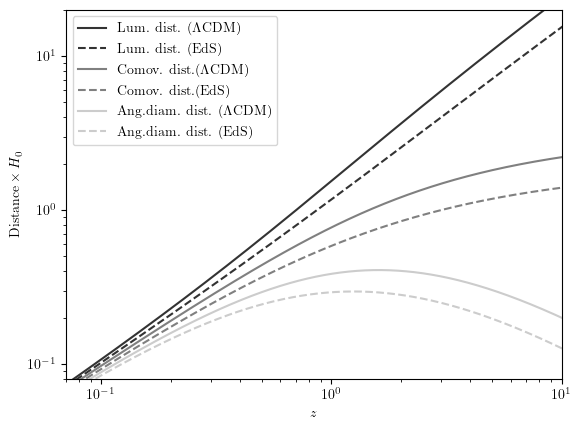

In [32]:
plt.loglog(z, lum_dist_LCDM*H0, color='0.2', label='Lum. dist. ($\\Lambda$CDM)')
plt.loglog(z, lum_dist_CDM*H0,'--', color='0.2', label='Lum. dist. (EdS)')

plt.loglog(z, com_dist_LCDM*H0, color='0.5', label='Comov. dist.($\\Lambda$CDM)')
plt.loglog(z, com_dist_CDM*H0,'--', color='0.5', label='Comov. dist.(EdS)')

plt.loglog(z, ang_dist_LCDM*H0, color='0.8', label='Ang.diam. dist. ($\\Lambda$CDM)')
plt.loglog(z, ang_dist_CDM*H0,'--', color='0.8', label='Ang.diam. dist. (EdS)')

plt.xlim([0.07, 10])
plt.ylim([0.08, 20])

plt.xlabel("$z$")
plt.ylabel("$\\mathrm{Distance}\\times H_0$")

plt.legend()

In addition to the background array obtained with `get_background`, the classy wrapper can also automatically interpolate and return values at desired reshifts, similarly to what we used to get $H_0$ with the `Hubble(z)` function.

A full list is available online in the readthedocs documentation [here](https://class-code.readthedocs.io/en/latest/wrapper_bg.html), but some important examples are:
`comoving_distance(z)`

`luminosity_distance(z)`

`angular_distance(z)`

`angular_distance_from_to(z1, z2)`